In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns


In [2]:
cars = pd.read_csv("Used_Car_Price_Prediction.csv")
cars.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'Used_Car_Price_Prediction.csv'

# Missing-Value Imputation

In [4]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
cars['original_price'] = imputer.fit_transform(cars[['original_price']])

# Visualizations

## Map Plots

**Sale Price Vs Fuel Type, Transmission, and Body Type**  

This plot should show how sale_price behaves for different fuel types, transmissions, or body types.
Boxplots summerize the spread and skew of prices and compare groups side by side.

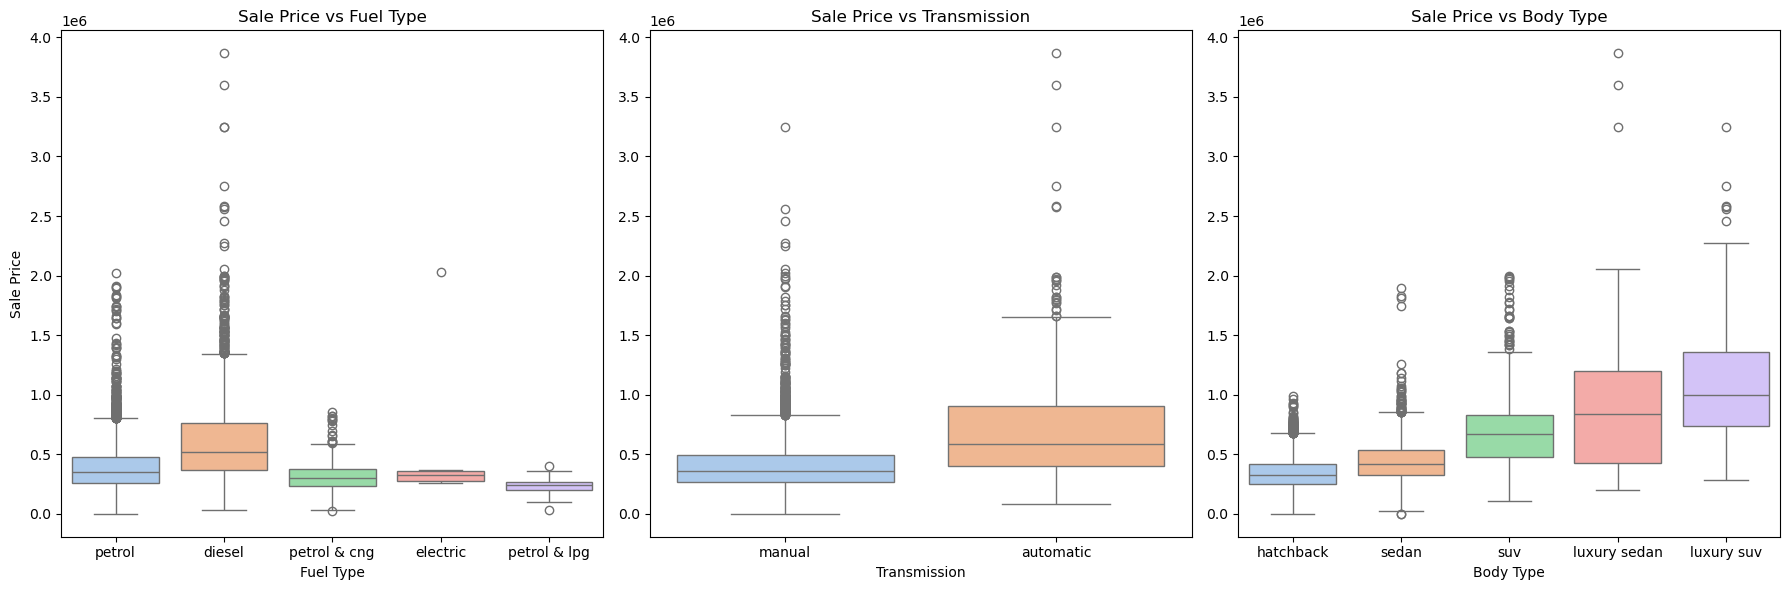

In [10]:
# Set up the figure with subplots for each categorical variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot: sale_price vs fuel_type
sns.boxplot(x='fuel_type', y='sale_price', data=cars, ax=axes[0],
            hue='fuel_type', palette='pastel', legend=False)
axes[0].set_title('Sale Price vs Fuel Type', fontsize=12)
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Sale Price')

# Boxplot: sale_price vs transmission
sns.boxplot(x='transmission', y='sale_price', data=cars, ax=axes[1],
           hue='transmission', palette='pastel', legend=False)
axes[1].set_title('Sale Price vs Transmission', fontsize=12)
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('')

# Boxplot: sale_price vs body_type
sns.boxplot(x='body_type', y='sale_price', data=cars, ax=axes[2],
           hue='body_type', palette='pastel', legend=False)
axes[2].set_title('Sale Price vs Body Type', fontsize=12)
axes[2].set_xlabel('Body Type')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

**Sale Price Vs Year of Manufacture depending on Fuel Type**

Scatter plot with Trendline : Reveals depreciation rate and whether fuel types age differently.


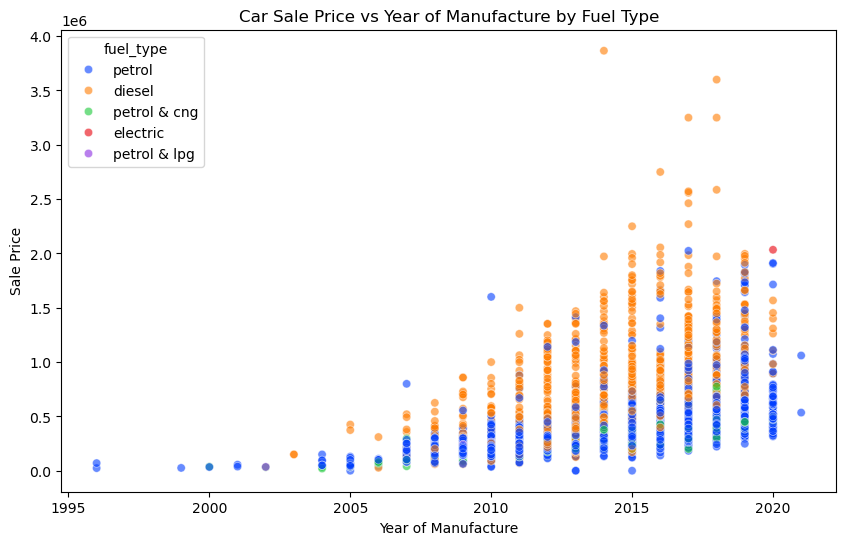

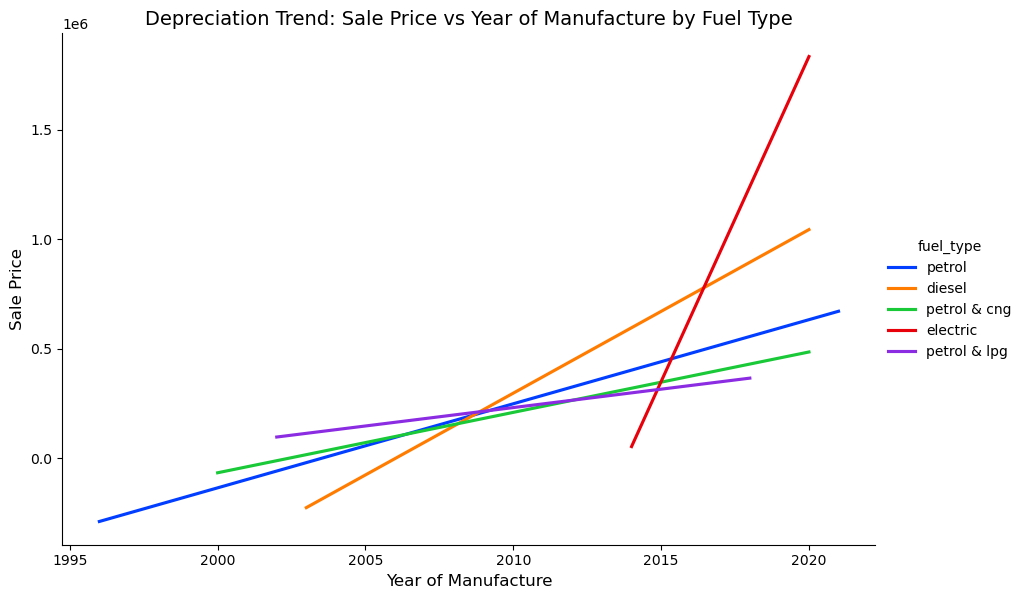

In [18]:
# Scatter layer: each point is a car, colored by fuel type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars, x='yr_mfr', y='sale_price',
    hue='fuel_type', alpha=0.6, palette='bright')

# Scatter Plot Titles and labels
plt.title('Car Sale Price vs Year of Manufacture by Fuel Type')
plt.xlabel('Year of Manufacture')
plt.ylabel('Sale Price')

# Add trendlines (regression lines) per fuel type
sns.lmplot(data=cars, x='yr_mfr', y='sale_price',
    hue='fuel_type', scatter=False, aspect=1.5, height=6,
    ci=None, palette='bright')

# Trendlines Titles and labels
plt.title('Depreciation Trend: Sale Price vs Year of Manufacture by Fuel Type', fontsize=14)
plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.show()

**Sale price versus Km run densitity**  
Hexbin plot with log : understand how mileage affects price,
shows both correlation and density


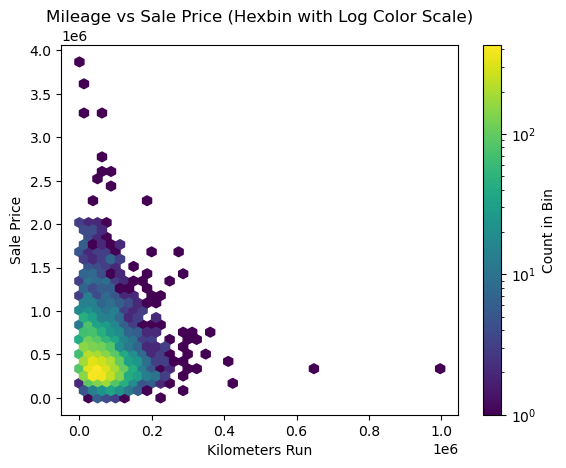

In [25]:
plt.hexbin(cars['kms_run'], cars['sale_price'],
            gridsize=40, cmap='viridis', norm=LogNorm())
plt.xlabel('Kilometers Run')
plt.ylabel('Sale Price')
plt.title('Mileage vs Sale Price (Hexbin with Log Color Scale)')
plt.colorbar(label='Count in Bin')
plt.show()

**Median sale price by city (Top 20)**

In [ ]:

# --- Parse dates ---
df_time = cars[['ad_created_on']].copy()
df_time['ad_created_on'] = pd.to_datetime(df_time['ad_created_on'], errors='coerce')
df_time = df_time.dropna(subset=['ad_created_on'])

# --- Monthly counts ---
df_time['month'] = df_time['ad_created_on'].dt.to_period('M').dt.to_timestamp()
count_over_time = df_time.groupby('month').size().rename('num_ads')

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(count_over_time.index, count_over_time.values)
plt.xlabel("Month")
plt.ylabel("Number of Ads")
plt.title("Count of Ads Over Time (Monthly)")
plt.tight_layout()
plt.show()

In [ ]:
#TODO: Pandas GeoData frame

In [ ]:
#TODO: City vs. brand name


In [ ]:
#TODO: City vs. average kilometers run

In [ ]:
#TODO: City vs. sale price for each car type

In [ ]:
#TODO: City vs transmission and fuel type